Healthcare data analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data=pd.read_csv('/content/healthcare_dataset.csv')

In [6]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [7]:
data.shape

(55500, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [9]:
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [10]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [11]:
data[data.duplicated()]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
50023,Samuel joYCe,56,Male,O+,Arthritis,2022-11-03,Krista Hartman,Thomas-Ballard,UnitedHealthcare,15654.830587,157,Urgent,2022-11-22,Aspirin,Inconclusive
50040,KIMBErly vasqueZ,26,Male,A-,Obesity,2023-10-23,Jennifer Bennett,Cowan Inc,UnitedHealthcare,38142.109678,313,Urgent,2023-11-18,Penicillin,Abnormal
50055,SCoTT tHOrNton,55,Female,B-,Obesity,2021-04-08,Joshua Ingram,Keller LLC,Medicare,30894.904511,455,Urgent,2021-04-15,Aspirin,Abnormal
50070,wiLliam LEe,27,Female,O+,Arthritis,2020-01-31,Lauren Montgomery,Winters-Simon,Cigna,46229.434901,153,Elective,2020-02-13,Lipitor,Normal
50078,chRistOPheR NoRrIs,38,Male,AB-,Arthritis,2023-01-14,Denise Blair,Inc Morales,Medicare,9072.127142,452,Emergency,2023-02-12,Penicillin,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55461,connOR coMPTon,63,Male,A+,Asthma,2021-08-21,Jonathan Allen,"and Willis Mullins, Bowers",Medicare,1936.702824,375,Emergency,2021-09-16,Paracetamol,Normal
55462,alYSsA mIlLER,35,Female,A-,Diabetes,2022-06-30,Ryan Price,Shelton-Gallagher,UnitedHealthcare,2210.460898,289,Elective,2022-07-27,Penicillin,Normal
55464,ChRIs huGHeS,35,Female,AB-,Obesity,2024-02-28,Katelyn Perry,Lyons-Hansen,Blue Cross,11889.154513,128,Emergency,2024-03-14,Paracetamol,Abnormal
55484,keNNEtH alvarez,80,Male,O+,Cancer,2022-05-05,Andrew Conner,Sons Mayo and,Cigna,45653.802310,114,Elective,2022-05-17,Aspirin,Normal


In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data.shape

(54966, 15)

There are 534 duplicate rows

In [14]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal


<Axes: xlabel='Gender', ylabel='Count'>

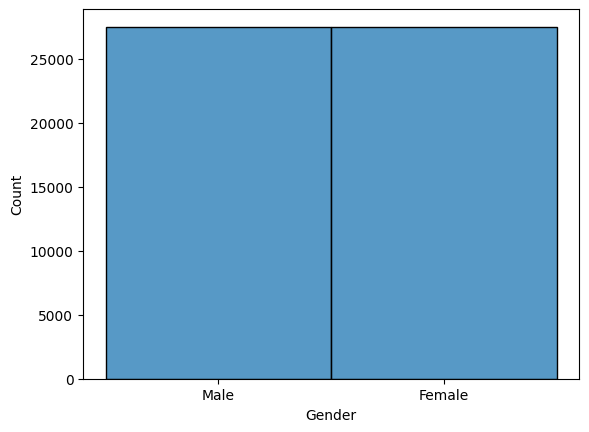

In [15]:
sns.histplot(data['Gender'])

<Axes: xlabel='Medical Condition', ylabel='Count'>

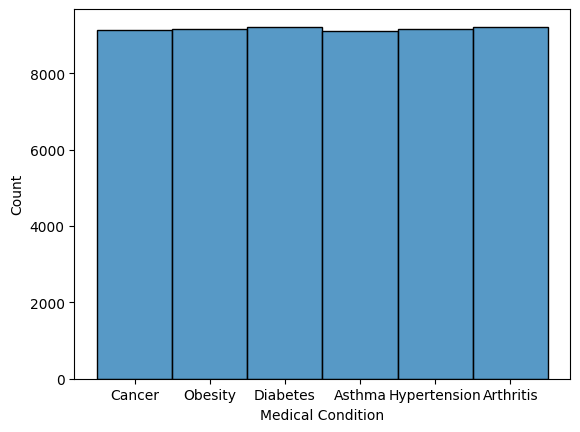

In [ ]:
sns.histplot(data['Medical Condition'])

In [ ]:
#The common medical condition is Diabetes

<Axes: xlabel='Test Results', ylabel='Count'>

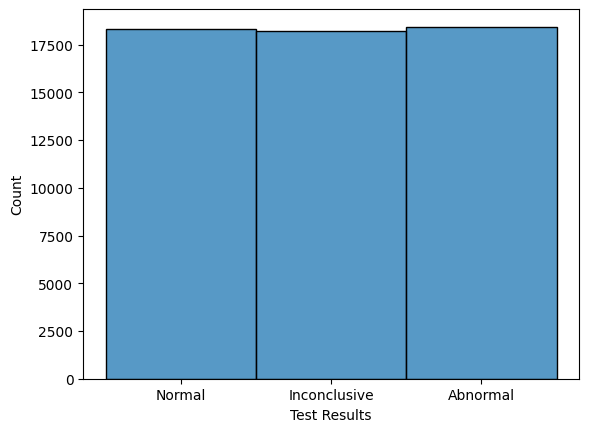

In [ ]:
sns.histplot(data['Test Results'])

Inorder to Identify the key factors affecting hospital stay length, let us create another column which descibes the length of days a patient stayed in the hospital.

In [17]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

In [18]:
data['length_of_stay'] = (data['Discharge Date'] - data['Date of Admission']).dt.days


In [19]:
data

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,length_of_stay
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal,30
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal,9
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal,28
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal,6


In [20]:
print("mean of length of stay",data['length_of_stay'].mean())
print("mode of length of stay",data['length_of_stay'].mode())
print("median of length of stay",data['length_of_stay'].median())

mean of length of stay 15.499290470472657
mode of length of stay 0    21
Name: length_of_stay, dtype: int64
median of length of stay 15.0


<Axes: xlabel='Test Results', ylabel='length_of_stay'>

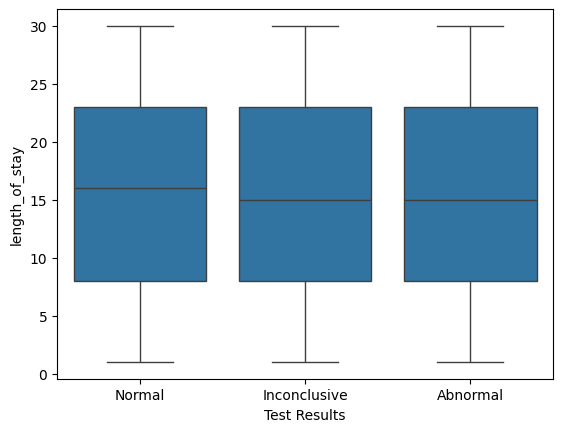

In [ ]:
sns.boxplot(data=data,x='Test Results',y='length_of_stay')

In [ ]:
list(data)

['Name',
 'Age',
 'Gender',
 'Blood Type',
 'Medical Condition',
 'Date of Admission',
 'Doctor',
 'Hospital',
 'Insurance Provider',
 'Billing Amount',
 'Room Number',
 'Admission Type',
 'Discharge Date',
 'Medication',
 'Test Results',
 'length_of_stay']

In [21]:
cols_to_drop=['Name','Room Number','Date of Admission','Discharge Date','Insurance Provider','Blood Type','Hospital','Gender']

In [22]:
data=data.drop(columns=cols_to_drop,axis=1)

In [23]:
data

,Age,Medical Condition,Doctor,Billing Amount,Admission Type,Medication,Test Results,length_of_stay
0,30,Cancer,Matthew Smith,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Obesity,Samantha Davies,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Obesity,Tiffany Mitchell,27955.096079,Emergency,Aspirin,Normal,15
3,28,Diabetes,Kevin Wells,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Cancer,Kathleen Hanna,14238.317814,Urgent,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...
55495,42,Asthma,Joshua Jarvis,2650.714952,Elective,Penicillin,Abnormal,30
55496,61,Obesity,Taylor Sullivan,31457.797307,Elective,Aspirin,Normal,9
55497,38,Hypertension,Joe Jacobs DVM,27620.764717,Urgent,Ibuprofen,Abnormal,28
55498,43,Arthritis,Kimberly Curry,32451.092358,Elective,Ibuprofen,Abnormal,6


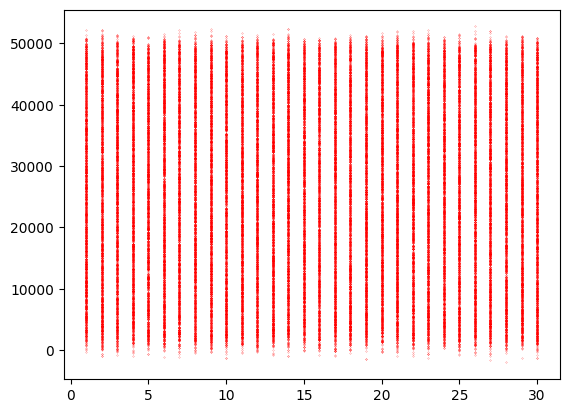

In [ ]:
plt.plot(data['length_of_stay'],data['Billing Amount'],linestyle='',marker='.',markersize=0.3,color='red')

<Axes: xlabel='length_of_stay', ylabel='Count'>

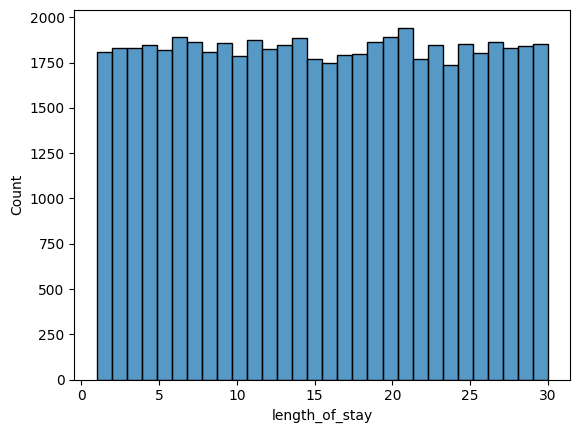

In [ ]:
sns.histplot(data['length_of_stay'],bins=30)

In [ ]:
data['length_of_stay']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: length_of_stay, Length: 54966, dtype: int64

In [ ]:
data['length_of_stay'].mode()

0    21
Name: length_of_stay, dtype: int64

<Axes: xlabel='Admission Type', ylabel='length_of_stay'>

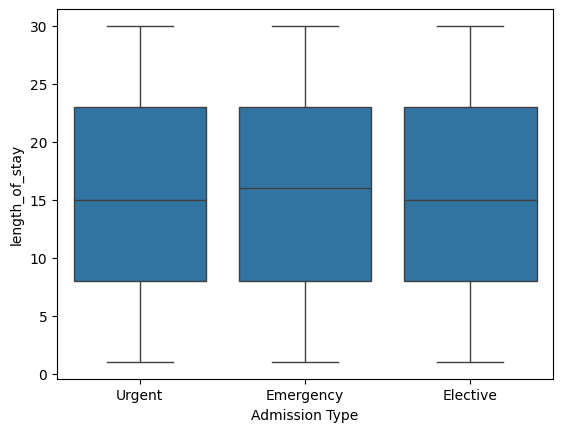

In [ ]:
sns.boxplot(data=data,x='Admission Type',y='length_of_stay')

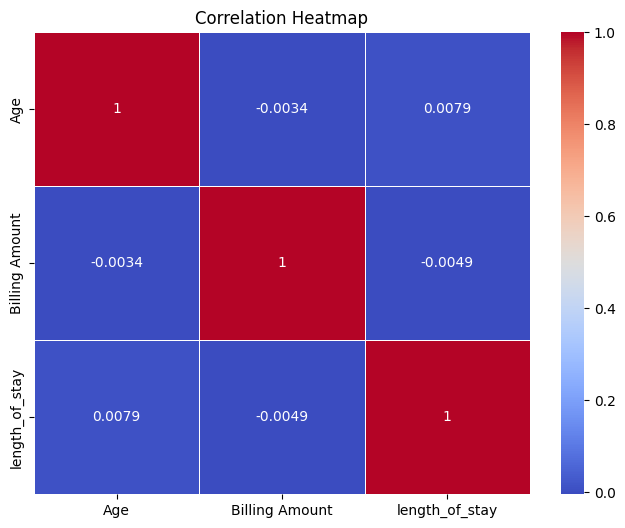

In [ ]:
cols = ['Age', 'Billing Amount', 'length_of_stay']

# Calculate correlation matrix
correlation_matrix = data[cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
data

,Age,Medical Condition,Doctor,Billing Amount,Admission Type,Medication,Test Results,length_of_stay
0,30,Cancer,Matthew Smith,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Obesity,Samantha Davies,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Obesity,Tiffany Mitchell,27955.096079,Emergency,Aspirin,Normal,15
3,28,Diabetes,Kevin Wells,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Cancer,Kathleen Hanna,14238.317814,Urgent,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...
55495,42,Asthma,Joshua Jarvis,2650.714952,Elective,Penicillin,Abnormal,30
55496,61,Obesity,Taylor Sullivan,31457.797307,Elective,Aspirin,Normal,9
55497,38,Hypertension,Joe Jacobs DVM,27620.764717,Urgent,Ibuprofen,Abnormal,28
55498,43,Arthritis,Kimberly Curry,32451.092358,Elective,Ibuprofen,Abnormal,6


In [24]:
new_columns=['Age','Medical Condition','Billing Amount','Admission Type','Medication','Test Results','length_of_stay']

In [31]:
new_columns

['Age',
 'Medical Condition',
 'Billing Amount',
 'Admission Type',
 'Medication',
 'Test Results',
 'length_of_stay']

In [33]:
data_new=data.loc[:,new_columns]

In [34]:
data_new

,Age,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,length_of_stay
0,30,Cancer,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Obesity,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Obesity,27955.096079,Emergency,Aspirin,Normal,15
3,28,Diabetes,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Cancer,14238.317814,Urgent,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...
55495,42,Asthma,2650.714952,Elective,Penicillin,Abnormal,30
55496,61,Obesity,31457.797307,Elective,Aspirin,Normal,9
55497,38,Hypertension,27620.764717,Urgent,Ibuprofen,Abnormal,28
55498,43,Arthritis,32451.092358,Elective,Ibuprofen,Abnormal,6


In [35]:
data_new.to_csv('Heathcare_cleaneddata.csv',index=False)

In [36]:
data_new=pd.read_csv('Heathcare_cleaneddata.csv')

In [37]:
data_new

,Age,Medical Condition,Billing Amount,Admission Type,Medication,Test Results,length_of_stay
0,30,Cancer,18856.281306,Urgent,Paracetamol,Normal,2
1,62,Obesity,33643.327287,Emergency,Ibuprofen,Inconclusive,6
2,76,Obesity,27955.096079,Emergency,Aspirin,Normal,15
3,28,Diabetes,37909.782410,Elective,Ibuprofen,Abnormal,30
4,43,Cancer,14238.317814,Urgent,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...
54961,42,Asthma,2650.714952,Elective,Penicillin,Abnormal,30
54962,61,Obesity,31457.797307,Elective,Aspirin,Normal,9
54963,38,Hypertension,27620.764717,Urgent,Ibuprofen,Abnormal,28
54964,43,Arthritis,32451.092358,Elective,Ibuprofen,Abnormal,6
